In [1]:
#1 load dataset
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
data = pd.DataFrame(data=wine.data,columns=wine.feature_names)
y = wine.target
y = pd.DataFrame(y, columns=['label'])
# print(y['label'].unique())
df = pd.concat([data,y],axis = 1 )

In [2]:
#2 display the dimensions, head, and tail of the dataset
row_count, col_count = data.shape
print(f"number of rows:{row_count}\nNumber of coloumns: {col_count}")
print("\nhead(first few rows) of the dataset:\n")
print(data.head())
print("\n\ntail(last few rows) of the dataset:\n")
print(data.tail())

number of rows:178
Number of coloumns: 13

head(first few rows) of the dataset:

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82         

In [3]:
#3 output of the names of all features along with their respective data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
#4 handle missing values by imputing them using mean, median, mode, or most frequently occurring
data['alcohol'].fillna(data.median())

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [19]:
#5 convert categorical and ordinal features into numerical representations
data['alcohol'] = data['alcohol'].apply(lambda x: 'H' if x>14.0 else 'L')
import category_encoders as ce
encoder= ce.OrdinalEncoder()
data['alcohol'] = encoder.fit_transform(data['alcohol'])

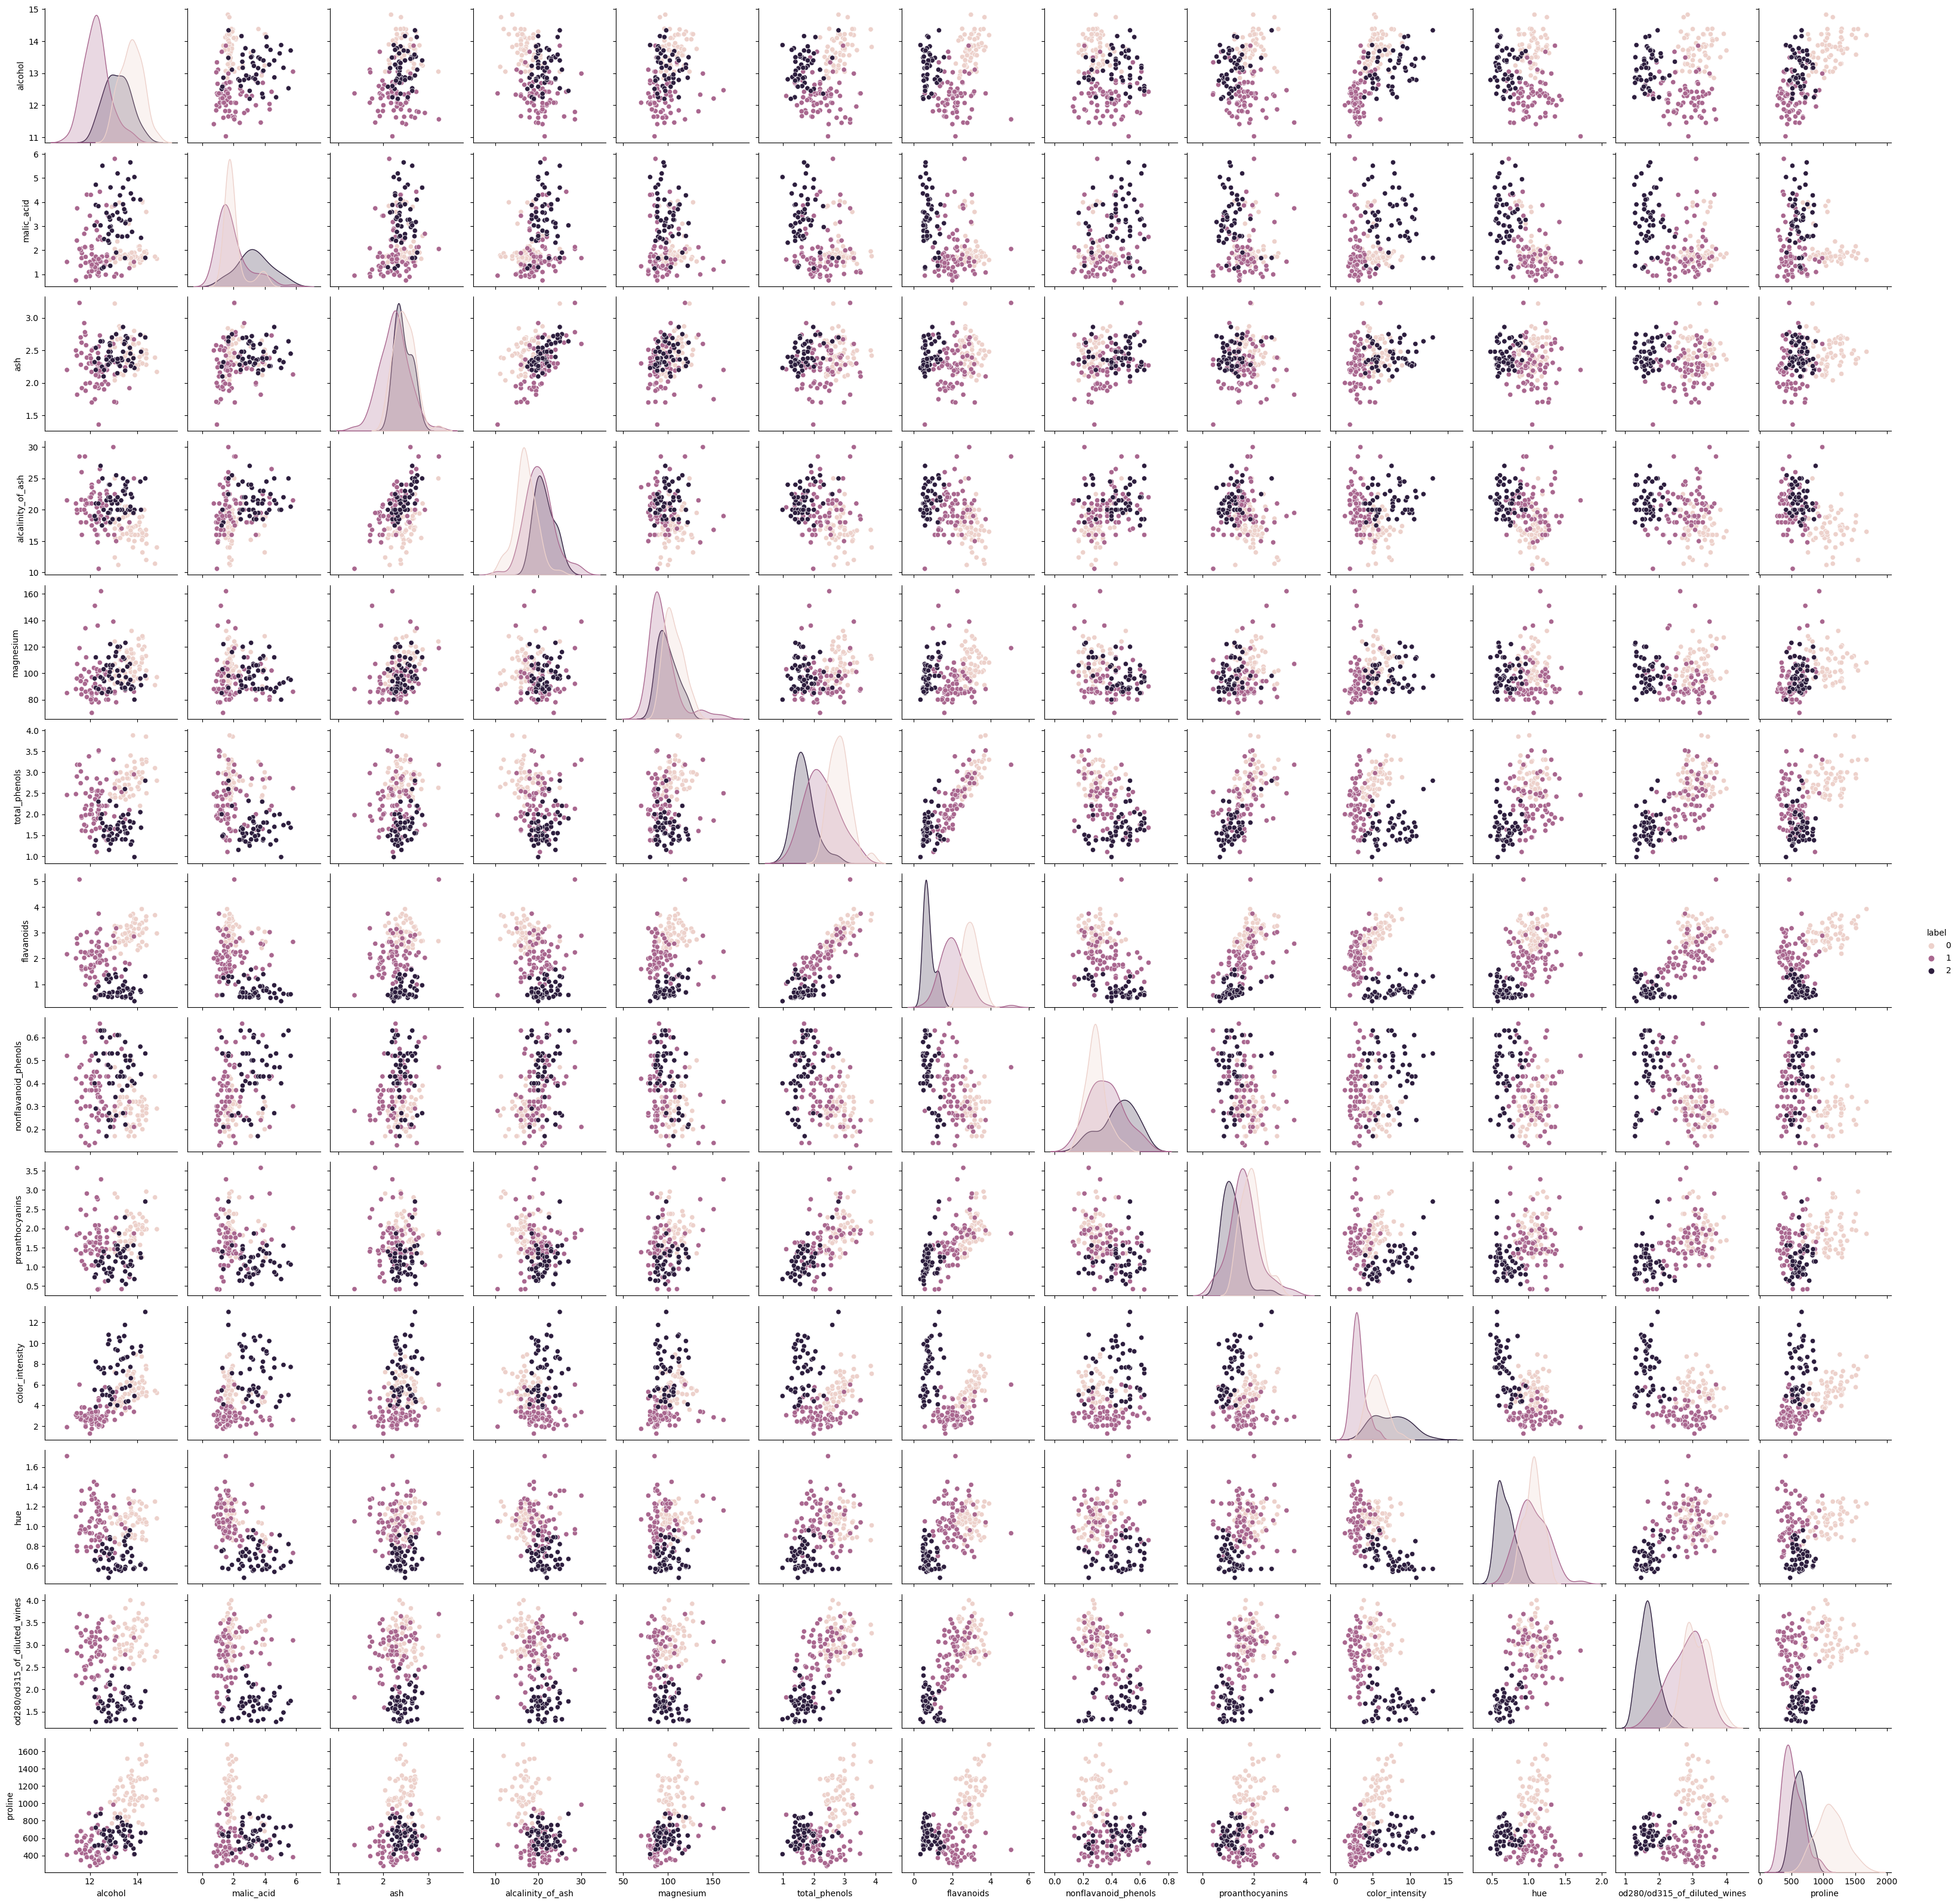

In [20]:
#6 visualize the distribution of each feature
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df, hue='label')
plt.show()

In [7]:
#7 calculate the min, max, median, and standard deviation of each feature
print(data.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.123596    2.336348    2.366517          19.494944   99.741573   
std      0.330048    1.117146    0.274344           3.339564   14.282484   
min      0.000000    0.740000    1.360000          10.600000   70.000000   
25%      0.000000    1.602500    2.210000          17.200000   88.000000   
50%      0.000000    1.865000    2.360000          19.500000   98.000000   
75%      0.000000    3.082500    2.557500          21.500000  107.000000   
max      1.000000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [9]:
#8 split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


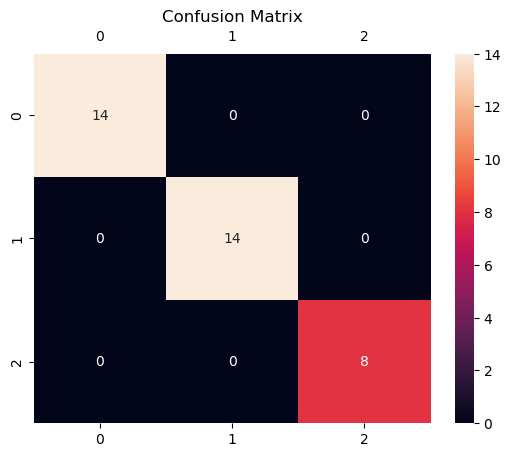

In [10]:
#9 navie bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# computing metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.tick_params(axis='x',labeltop=True)
plt.title("Confusion Matrix")
plt.show()



In [16]:
cm= confusion_matrix(y_test, y_pred)
TP= cm[1, 1]
FN= cm[1, 0]
specificity= TP/ (TP+FN)
print('the specificity of the matrix is: ', specificity)

the specificity of the matrix is:  1.0


In [13]:
# classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

